In [2]:
from os.path import join as pathjoin
import sys
sys.path.insert(0, '/home/mlepekhin/Non-thematic-Text-Classification/code/allennlp_experiments')
from data_processing import *
from interpretation import *
from models import *
from training import *

In [3]:
!gpustat

seven                Fri Feb 17 14:07:34 2023  470.161.03
[0] NVIDIA TITAN RTX | 25'C,   0 % |  1094 / 24220 MB | mlepekhin(1091M)
[1] NVIDIA TITAN RTX | 27'C,   0 % |     3 / 24220 MB |
[2] NVIDIA TITAN RTX | 28'C,   0 % | 23526 / 24220 MB | mlepekhin(23523M)
[3] NVIDIA TITAN RTX | 27'C,   0 % |     3 / 24220 MB |


Let's download all the data.

In [4]:
!mkdir /home/mlepekhin/models/competition


DATA_DIR = '/home/mlepekhin/data'
MODELS_DIR = '/home/mlepekhin/models/competition'
MODEL_ID = 'bert_en_multi_news2' 
CHECKPOINTS_DIR = pathjoin(MODELS_DIR, MODEL_ID, 'checkpoints')
BEST_MODEL = pathjoin(CHECKPOINTS_DIR, 'best.th')

mkdir: cannot create directory ‘/home/mlepekhin/models/competition’: File exists


In [5]:
transformer_model = 'bert-base-multilingual-cased'
MAX_TOKENS = 512

In [6]:
pd.read_csv('ru_train_dct_upsampled.csv').append(pd.read_csv('en_train_dct_upsampled.csv')).sample(frac=1.0, random_state=42).to_csv('ru_en_train_dct_upsampled.csv')

In [7]:
train_dataset_reader = build_transformer_dataset_reader(transformer_model, lower=True)
val_dataset_reader = build_transformer_dataset_reader(transformer_model, lower=True)

train_data, dev_data = read_data(
    "en_train_dct_upsampled.csv", 
    "en_train_dct.csv", 
    train_dataset_reader, 
    val_dataset_reader
)

vocab = Vocabulary().from_files('/home/mlepekhin/models/competition/bert_en_multi_news/vocab')

train_data.index_with(vocab)
dev_data.index_with(vocab)

02172023 14:07:36|INFO|transformers.configuration_utils| loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-config.json from cache at /home/mlepekhin/.cache/torch/transformers/45629519f3117b89d89fd9c740073d8e4c1f0a70f9842476185100a8afe715d1.65df3cef028a0c91a7b059e4c404a975ebe6843c71267b67019c0e9cfa8a88f0
02172023 14:07:36|INFO|transformers.configuration_utils| Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "firs

02172023 14:07:43|INFO|transformers.configuration_utils| loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-config.json from cache at /home/mlepekhin/.cache/torch/transformers/45629519f3117b89d89fd9c740073d8e4c1f0a70f9842476185100a8afe715d1.65df3cef028a0c91a7b059e4c404a975ebe6843c71267b67019c0e9cfa8a88f0
02172023 14:07:43|INFO|transformers.configuration_utils| Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "firs

Reading data
<class 'data_processing.ClassificationDatasetReader'> en_train_dct_upsampled.csv


0it [00:00, ?it/s]

0it [00:00, ?it/s]

02172023 14:08:13|INFO|allennlp.data.vocabulary| Loading token dictionary from /home/mlepekhin/models/competition/bert_en_multi_news/vocab.
02172023 14:08:13|INFO|filelock| Lock 140304386751216 acquired on /home/mlepekhin/models/competition/bert_en_multi_news/vocab/.lock
02172023 14:08:13|INFO|filelock| Lock 140304386751216 released on /home/mlepekhin/models/competition/bert_en_multi_news/vocab/.lock


In [8]:
model = build_transformer_model(vocab, transformer_model)
model.load_state_dict(torch.load('/home/mlepekhin/models/competition/bert_en_multi/checkpoints/best.th'))

Building the model


02172023 14:08:14|INFO|transformers.configuration_utils| loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-config.json from cache at /home/mlepekhin/.cache/torch/transformers/45629519f3117b89d89fd9c740073d8e4c1f0a70f9842476185100a8afe715d1.65df3cef028a0c91a7b059e4c404a975ebe6843c71267b67019c0e9cfa8a88f0
02172023 14:08:14|INFO|transformers.configuration_utils| Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "firs

<All keys matched successfully>

In [9]:
if torch.cuda.is_available():
    cuda_device = 1
    model = model.cuda(cuda_device)
else:
    cuda_device = -1
print(cuda_device)

1


In [10]:
#!rm -rf {CHECKPOINTS_DIR}
#!mkdir -p {CHECKPOINTS_DIR}

In [11]:
from evaluate_transformer_classifier import *

In [12]:
#dev_text_list = pd.read_csv('/home/mlepekhin/data/en_train').text.values
dev_text_list = pd.read_csv('en_dev.csv').text.values
tokenizer = PretrainedTransformerTokenizer(transformer_model)
indexer = PretrainedTransformerIndexer(transformer_model)
    
    
labels = predict_labels_for_texts(dev_text_list, 8, model, tokenizer, indexer, vocab, device=f'cuda:{cuda_device}')

02172023 14:08:29|INFO|transformers.configuration_utils| loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-config.json from cache at /home/mlepekhin/.cache/torch/transformers/45629519f3117b89d89fd9c740073d8e4c1f0a70f9842476185100a8afe715d1.65df3cef028a0c91a7b059e4c404a975ebe6843c71267b67019c0e9cfa8a88f0
02172023 14:08:29|INFO|transformers.configuration_utils| Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "firs

In [13]:
#labels1 = sorted(np.unique(pd.read_csv('/home/mlepekhin/data/en_train').target.values))
labels1 = ['reporting', 'opinion', 'satire']
labels2 = ['reporting', 'opinion', 'satire']
all_labels = labels1

In [14]:
from sklearn.metrics import confusion_matrix

02172023 14:08:36|INFO|numexpr.utils| Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
02172023 14:08:36|INFO|numexpr.utils| NumExpr defaulting to 8 threads.


([<matplotlib.axis.XTick at 0x7f9a4e37af70>,
 [Text(0.5, 0, 'reporting'), Text(1.5, 0, 'opinion'), Text(2.5, 0, 'satire')])

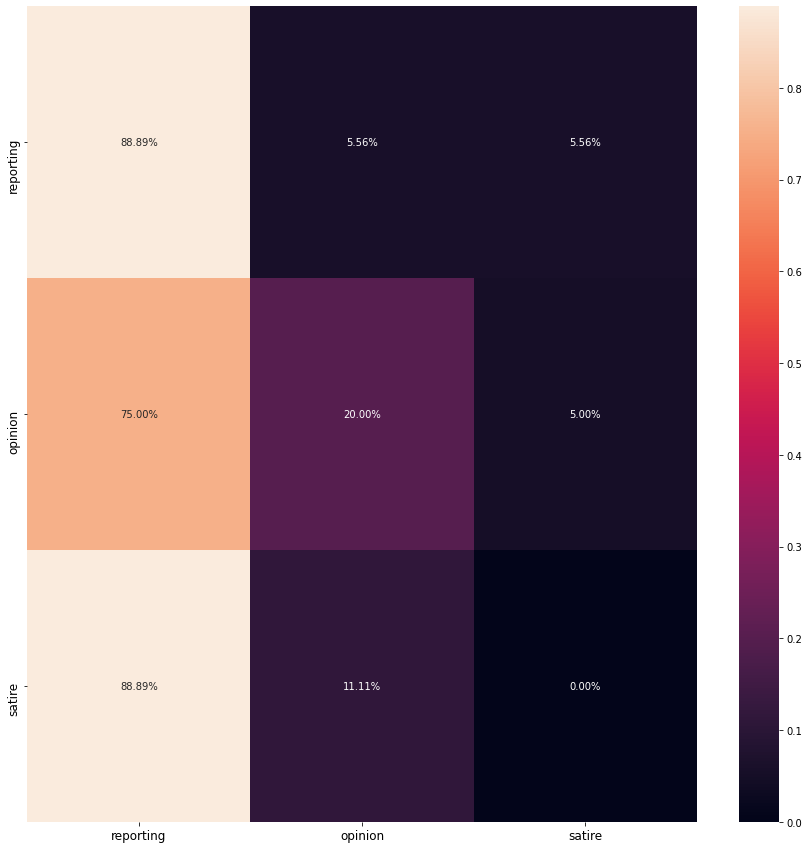

In [15]:
plt.figure(figsize=(15, 15)) 
cm = confusion_matrix(pd.read_csv('en_dev.csv').target.values, labels, labels=all_labels)[:11, -3:]
sums = np.sum(cm, axis=1)

normed_cm = (cm.T / sums).T
sns.heatmap(normed_cm, annot=True, fmt='.2%')
plt.yticks(0.5 + np.arange(len(labels1)), labels=labels1, fontsize=12)
plt.xticks(0.5 + np.arange(len(labels2)), labels=labels2, fontsize=12)

In [16]:
cm

array([[48,  3,  3],
       [15,  4,  1],
       [ 8,  1,  0]])